# Chapter 4 - Numpy Basic : Arrays and Vectorized Computation

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

## Array Oriented Programming

In [80]:
points = np.arange(-5,5,0.01)
print (f'Number Dimention \t: {points.ndim}')
print (f'Data Type \t\t: {points.dtype}')
print (f'Size \t\t\t: {points.size}')
print (f'Shape \t\t\t: {points.shape}')

Number Dimention 	: 1
Data Type 		: float64
Size 			: 1000
Shape 			: (1000,)


In [81]:
print(np.meshgrid.__doc__)


    Return coordinate matrices from coordinate vectors.

    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.

    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.

    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.

        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True the shape of the returned coordinate array for dimension *i*
        is reduced from ``(N1, ..., Ni, ... Nn)`` to
        ``(1, ..., 1, Ni, 1, ..., 1)``.  These sparse coordinate grids are
        intended to be use with :ref:`basics.broadcasting`.  When all
        coordinates are used in an expression, broadcasting still leads to a
        fully-dimensonal resu

In [82]:
xs, ys = np.meshgrid(points, points)

In [83]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [84]:
ys[0:5,0:5]

array([[-5.  , -5.  , -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, -4.98, -4.98],
       [-4.97, -4.97, -4.97, -4.97, -4.97],
       [-4.96, -4.96, -4.96, -4.96, -4.96]])

In [85]:
ys[0:5,0:5] == xs[0:5,0:5]

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True]])

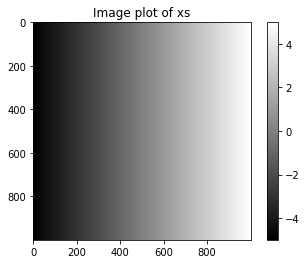

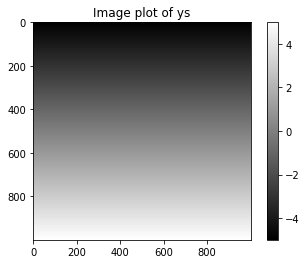

In [86]:
import matplotlib.pyplot as plt
plt.imshow(xs, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of xs")
plt.show()

plt.imshow(ys, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of ys")
plt.show()

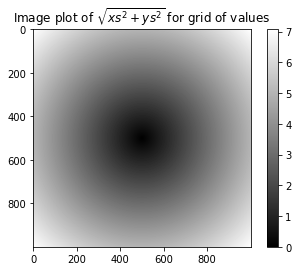

In [87]:
z = np.sqrt(xs**2 + ys**2)

plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{xs^2 + ys^2}$ for grid of values")
plt.show()

In [88]:
ar = np.arange(5)
x,y = np.meshgrid(ar,ar)

In [89]:
x

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [90]:
y

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

### Expressing Conditional Logic as Array Operations

In [91]:
xarr = np.arange(1.1, 1.6,0.1)
yarr =  np.arange(2.1, 2.6,0.1)
cond = np.array([True, False, True, True, False])

In [92]:
# ambil niali dengan nilai true
test = list (x if c else y for x,y,c in zip(xarr,yarr,cond))
print(test)

[1.1, 2.2, 1.3000000000000003, 1.4000000000000004, 2.5000000000000004]


In [94]:
np.where (cond,xarr,yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

> Buat matriks 4 x 4
Gantilah nilai pada matriks menjadi -2 jika nilai tersebut negatif dan ubah menjadi 2 jika nilai tersebut positif

In [96]:
rng = np.random.default_rng(seed=42)
arr_rand = rng.standard_normal((4,4))
arr_rand

array([[ 0.30471708, -1.03998411,  0.7504512 ,  0.94056472],
       [-1.95103519, -1.30217951,  0.1278404 , -0.31624259],
       [-0.01680116, -0.85304393,  0.87939797,  0.77779194],
       [ 0.0660307 ,  1.12724121,  0.46750934, -0.85929246]])

In [97]:
np.where(arr_rand < 0, -2, 2)

array([[ 2, -2,  2,  2],
       [-2, -2,  2, -2],
       [-2, -2,  2,  2],
       [ 2,  2,  2, -2]])

In [99]:
# Kombinasi scalars dengan arrays
np.where(arr_rand < 0 , arr_rand, 2)

array([[ 2.        , -1.03998411,  2.        ,  2.        ],
       [-1.95103519, -1.30217951,  2.        , -0.31624259],
       [-0.01680116, -0.85304393,  2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        , -0.85929246]])

### Mathematical and Statistical Methods

In [102]:
grn = np.random.default_rng(seed=42)
arr = grn.standard_normal((5,4))
arr

array([[ 0.30471708, -1.03998411,  0.7504512 ,  0.94056472],
       [-1.95103519, -1.30217951,  0.1278404 , -0.31624259],
       [-0.01680116, -0.85304393,  0.87939797,  0.77779194],
       [ 0.0660307 ,  1.12724121,  0.46750934, -0.85929246],
       [ 0.36875078, -0.9588826 ,  0.8784503 , -0.04992591]])

In [103]:
# Menggunakan instance array
arr.mean()

-0.032932090814718026

In [104]:
# menggunakan top-level function
np.mean(arr)

-0.032932090814718026

In [105]:
np.sum(arr)

-0.6586418162943605

In [108]:
# aggregate function with axis argumen

arr = np.array([[1,3,5,7],[2,4,6,8]])
arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [109]:
arr.sum(axis=0)

array([ 7,  9, 11, 13, 15])

In [110]:
arr.sum(axis=1)

array([15, 40])

In [119]:
# Non aggregate statistical function
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [120]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [122]:
# Cum sum multidimensional array
arr = np.array([[1,3,5,7],[2,4,6,8]])
arr

array([[1, 3, 5, 7],
       [2, 4, 6, 8]])

In [123]:
arr.cumsum(axis=0)

array([[ 1,  3,  5,  7],
       [ 3,  7, 11, 15]])

In [124]:
arr.cumsum(axis=1)

array([[ 1,  4,  9, 16],
       [ 2,  6, 12, 20]])

### Method for Boolean Array

In [138]:
rng = np.random.default_rng(seed=42)
arr = rng.standard_normal((3,3))
arr

array([[ 0.30471708, -1.03998411,  0.7504512 ],
       [ 0.94056472, -1.95103519, -1.30217951],
       [ 0.1278404 , -0.31624259, -0.01680116]])

In [139]:
(arr > 0)

array([[ True, False,  True],
       [ True, False, False],
       [ True, False, False]])

In [142]:
(arr>0).sum(), (arr<0).sum()

(4, 5)

Fungsi **any** dan **all**
- any, akan mengembalikan nilai true jika array mengandung nilai true
- all, akan mengembalikan nilai true jika semua array bernilai true

*any dan array dapat digunakan pada array bertipe numerik, nilai 0 akan dianggal false*

In [147]:
arr_bool = np.array([False,True,True,False,False,True,False,True,True])
any(arr_bool), all(arr_bool)

(True, False)

### Sorting

In [170]:
# Array sorting
rng = np.random.default_rng(seed=42)
arr = rng.standard_normal((4,4))

In [171]:
np.sort(arr)

array([[-1.03998411,  0.30471708,  0.7504512 ,  0.94056472],
       [-1.95103519, -1.30217951, -0.31624259,  0.1278404 ],
       [-0.85304393, -0.01680116,  0.77779194,  0.87939797],
       [-0.85929246,  0.0660307 ,  0.46750934,  1.12724121]])

In [176]:
# Penggunakan axis ini sama dengan tanpa menggunakan argumen axis
np.sort(arr,axis=1)

array([[-1.03998411,  0.30471708,  0.7504512 ,  0.94056472],
       [-1.95103519, -1.30217951, -0.31624259,  0.1278404 ],
       [-0.85304393, -0.01680116,  0.77779194,  0.87939797],
       [-0.85929246,  0.0660307 ,  0.46750934,  1.12724121]])

In [174]:
np.sort(arr,axis=0)

array([[-1.95103519, -1.30217951,  0.1278404 , -0.85929246],
       [-0.01680116, -1.03998411,  0.46750934, -0.31624259],
       [ 0.0660307 , -0.85304393,  0.7504512 ,  0.77779194],
       [ 0.30471708,  1.12724121,  0.87939797,  0.94056472]])

In [178]:
# sort pada instance akan merubah array asli
arr.sort()
arr

array([[-1.03998411,  0.30471708,  0.7504512 ,  0.94056472],
       [-1.95103519, -1.30217951, -0.31624259,  0.1278404 ],
       [-0.85304393, -0.01680116,  0.77779194,  0.87939797],
       [-0.85929246,  0.0660307 ,  0.46750934,  1.12724121]])

### Unique and Other Set Logic

In [193]:
# Built-in Python
daftar_nama = ("Farras","Farras","Tania","Faris","Faris","Noah", "Tania","Farras")
nama_unik = sorted(set(daftar_nama))
nama_unik

['Faris', 'Farras', 'Noah', 'Tania']

In [196]:
# Uniqe menggunakan np.unique
arr_nama = np.array(daftar_nama)
np.unique(arr_nama)

array(['Faris', 'Farras', 'Noah', 'Tania'], dtype='<U6')

**in1d**

In [198]:
arr = np.array((8,9,8,4,3,1))
checks = np.array((10,7,6,8,9,8))

np.in1d(arr,checks)

array([ True,  True,  True, False, False, False])